In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
print(sys.version)

3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]


In [2]:
sns.set()

## Discrete Variables
Discrete variables are countable in a finite amount of time. For example, we can count the change in your pocket. we can count the money in your bank account. we could also count the amount of money in everyone’s bank account. It might take long time to count that last item, but the point is — it’s still countable.

## Bernouli trials

#### Random Number generator

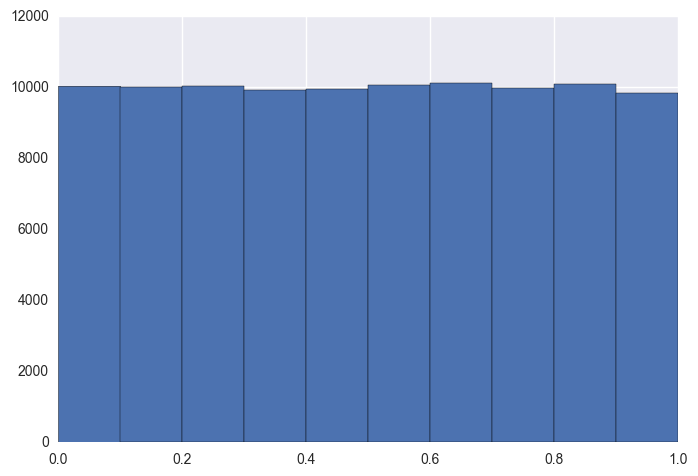

In [3]:

np.random.seed(42)
random_numbers = np.empty(100000)

# Generate random numbers 
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()


In [4]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p and return number of successes."""

    n_success = 0

    for i in range(n):
        random_number = np.random.random()
        # If less than p, it's a success 
        if random_number < p:
            n_success += 1

    return n_success


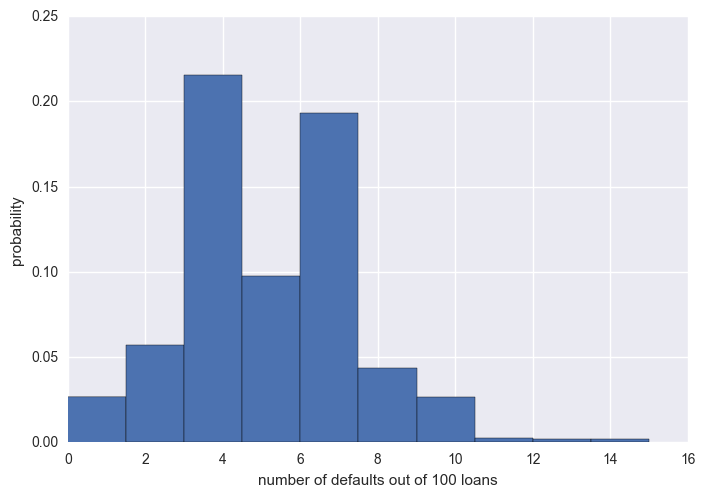

In [5]:

np.random.seed(42)

n_defaults = np.empty(1000)
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()


In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)
    x = np.sort(data)
    # The y data of the ECDF go from 1/n to 1 in equally spaced increments, that we construct using np.arange().
    # The end value in np.arange() is not inclusive. Therefore, np.arange() will need to go from 1 to n+1. 
    # Be sure to divide this by n.
    y = np.arange(1, n+1) / n 

    return x, y

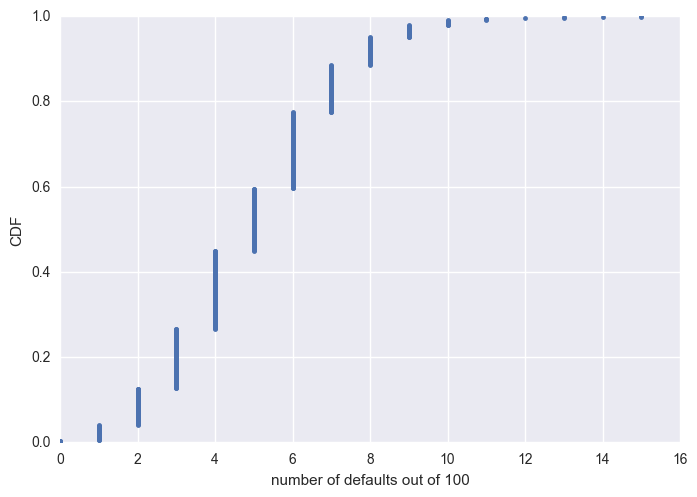

Probability of losing money = 0.022


In [7]:
x, y = ecdf(n_defaults)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('CDF')

plt.show()

n_lose_money = np.sum(n_defaults >= 10)

# probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

## Sampling out of the Binomial distribution

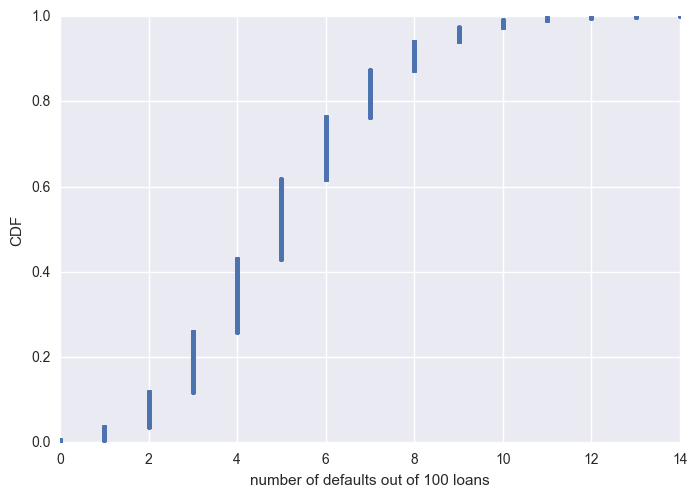

In [8]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

x, y = ecdf(n_defaults)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('CDF')

plt.show()


### Plotting the Binomial PMF

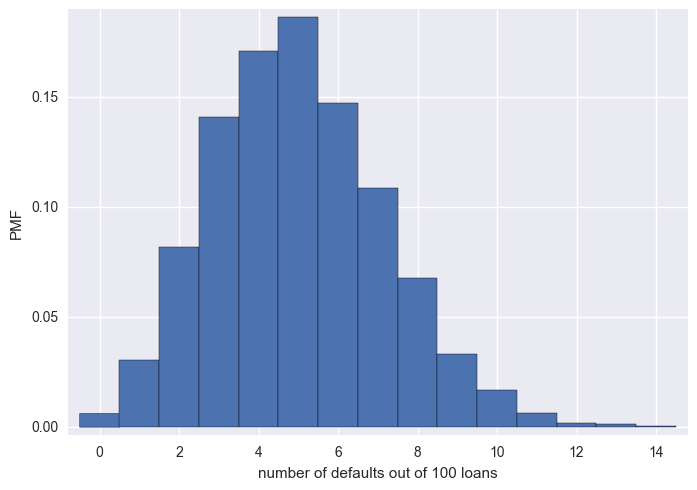

In [9]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

_ = plt.hist(n_defaults, normed=True, bins=bins)

plt.margins(0.02)

_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')

plt.show()

In [10]:
np.arange?

## Poisson processes and the Poisson distribution

### Poisson process


### Relationship between Binomial and Poisson distributions


In [11]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

Poisson:      10.0145 3.17135456075


1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [12]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

n_large = np.sum(n_nohitters >= 7)

p_large = n_large / 10000

print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0072


## What is a Continuous Variable?

A variable is a quantity that has a changing value; the value can vary from one example to the next. A continuous variable is a variable that has an infinite number of possible values. In other words, any value is possible for the variable.

A continuous variable is the opposite of a discrete variable, which can only take on a certain number of values.

### Probability Density functions
    - Continuous analog to Probability Mass Function(PDF)

### Normal Distribution / Gaussian Distribution
Normal distribution is parameterized with two factors 
    - mean of a normal distribution( not from computed data)
    - standard deviation of normal distribution( not from computed data)


### The Normal PDF

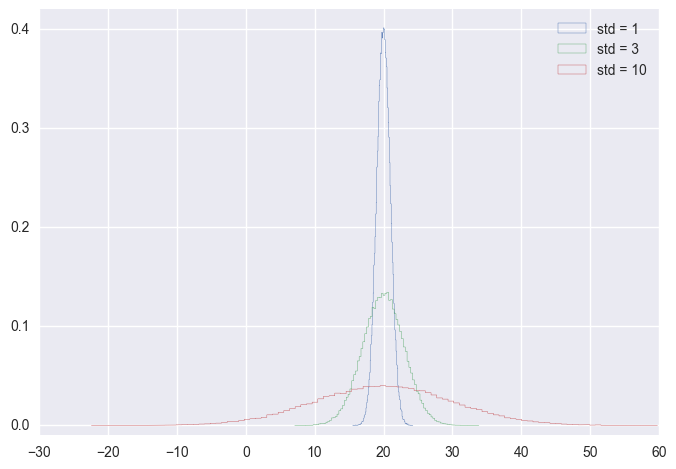

In [13]:

samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

_ = plt.hist(samples_std1, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, normed=True, histtype='step')


_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

### The Normal CDF 

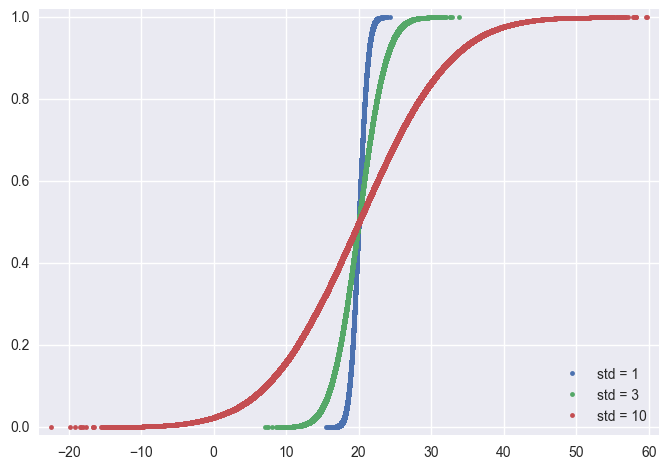

In [14]:

x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

plt.margins(0.02)

_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


### Are the Belmont Stakes results Normally distributed?
Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

datasource: https://docs.google.com/spreadsheets/d/1ue-CpITdNk3SrCCmKtCzagU9JZ26dsEU1jgIizUWY_E/edit#gid=0

In [40]:
import datetime
def dateparse (time_in_mins):    
    return datetime.datetime.fromtimestamp(float(time_in_mins))

def date_parser(string_list):
    return [time.ctime(float(x)) for x in string_list]


In [41]:
df = pd.read_csv('../dataset/Belmont.csv')

df.head()

,Year,Winner,Sire,Dam,2nd Pl,3rd Pl,Time,Dist,# Starters,Comments (source: Pedigree Query)
0,2016,Creator,Tapit,Morena,Destin,Lani,2:28.51,12 F,13.0,Track: Fast; 13 Ran; Won By A Nose
1,2015,American Pharoah,Pioneerof The Nile,Littleprincessemma,Frosted,Keen Ice,2:26.65,12 F,8.0,"Track: Fast, Triple Crown Winner"
2,2014,Tonalist,Tapit,Settling Mist,Commissioner,Medal Count,2:28.52,12 F,11.0,Hd; 4th (Dh) California Chrome/Wicked Strong
3,2013,Palace Malice,Curlin,Palace Rumor,Oxbow,Orb,2:30.70,12 F,14.0,NaN
4,2012,Union Rags,Dixie Union,Tempo,Paynter,Atigun,2:30.42,12 F,11.0,NaN


In [42]:
df['Time_mins'] = df['Time'].str.split(':').str[0].astype(float) * 60 \
+ df['Time'].str.split(':').str[1].str.split('.').str[0].astype(float) \
+ df['Time'].str.split('.').str[-1].astype(float)/100

df.head()

,Year,Winner,Sire,Dam,2nd Pl,3rd Pl,Time,Dist,# Starters,Comments (source: Pedigree Query),Time_mins
0,2016,Creator,Tapit,Morena,Destin,Lani,2:28.51,12 F,13.0,Track: Fast; 13 Ran; Won By A Nose,148.51
1,2015,American Pharoah,Pioneerof The Nile,Littleprincessemma,Frosted,Keen Ice,2:26.65,12 F,8.0,"Track: Fast, Triple Crown Winner",146.65
2,2014,Tonalist,Tapit,Settling Mist,Commissioner,Medal Count,2:28.52,12 F,11.0,Hd; 4th (Dh) California Chrome/Wicked Strong,148.52
3,2013,Palace Malice,Curlin,Palace Rumor,Oxbow,Orb,2:30.70,12 F,14.0,NaN,150.70
4,2012,Union Rags,Dixie Union,Tempo,Paynter,Atigun,2:30.42,12 F,11.0,NaN,150.42


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
Year                                 150 non-null int64
Winner                               150 non-null object
Sire                                 148 non-null object
Dam                                  148 non-null object
2nd Pl                               148 non-null object
3rd Pl                               147 non-null object
Time                                 146 non-null object
Dist                                 148 non-null object
# 
Starters                          148 non-null float64
Comments (source: Pedigree Query)    145 non-null object
Time_mins                            146 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.0+ KB


In [51]:
df.Time_mins.dropna(inplace=True)
belmont_no_outliers = np.array(df.Time_mins)
print(belmont_no_outliers)
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)
print(mu,sigma)
samples = np.random.normal(mu, sigma, size=10000)
print(samples)

[ 148.51  146.65  148.52  150.7   150.42  150.88  151.57  147.54  149.65
  148.74  147.86  148.75  147.5   148.26  149.71  146.56  151.19  147.88
  149.16  148.82  148.96  152.02  146.82  149.97  146.13  148.1   147.2
  146.    146.4   148.2   149.8   147.    147.2   147.8   148.2   149.
  149.8   148.6   146.8   149.6   149.    148.2   149.2   144.    148.
  150.4   154.    148.8   147.2   148.8   149.6   148.4   148.4   150.2
  148.8   149.2   149.2   148.4   150.2   146.6   149.8   149.    150.8
  148.6   150.2   149.    148.6   150.2   148.2   149.4   150.8   150.2
  152.2   148.2   149.2   151.    149.6   149.6   149.4   148.6   150.
  150.6   149.2   152.6   152.8   149.6   151.6   152.8   153.2   152.4
  152.2   136.8   138.8   139.    138.8   136.8   134.2   137.4   140.4
  137.8   142.    138.4   140.    138.    142.    141.6   140.    128.
  126.6   141.75  142.6   141.    141.25  143.    152.    143.25  144.5
  131.5   116.5   113.25  137.    128.75  127.75  167.25  160.25  

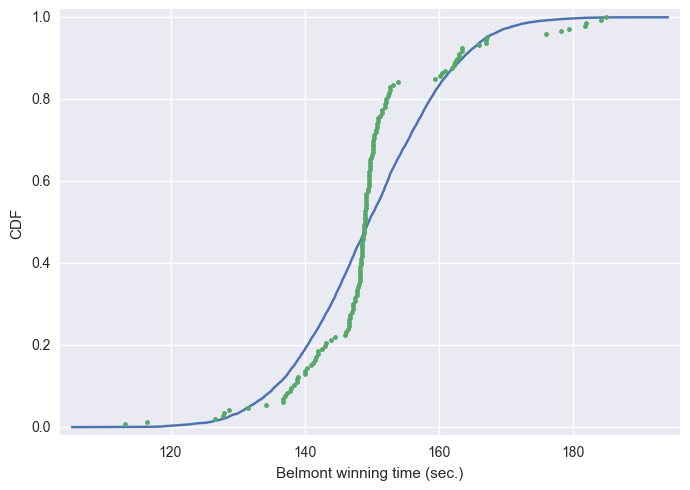

In [52]:

x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

#### What are the chances of a horse matching or beating Secretariat's record?
Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?



In [53]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.304914
